# Libraries

In [74]:
# Data acquisition & visualization libraries
import re
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation Libraries
from urllib.parse import urlparse
from category_encoders.one_hot import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

# Model Building Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Data Acquisition

In [2]:
# Loading datasets as DataFrames
test_df = pd.read_csv('test.csv', index_col='qa_id')
train_df = pd.read_csv('train.csv', index_col='qa_id')
samp_sum_df = pd.read_csv('sample_submission.csv')

In [3]:
# Shape of datasets given
print('Train data ', train_df.shape)
print('Test data ', test_df.shape)
print('Sample submission data ', samp_sum_df.shape)

Train data  (6079, 40)
Test data  (476, 10)
Sample submission data  (476, 31)


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 39 to 9640
Data columns (total 10 columns):
question_title        476 non-null object
question_body         476 non-null object
question_user_name    476 non-null object
question_user_page    476 non-null object
answer                476 non-null object
answer_user_name      476 non-null object
answer_user_page      476 non-null object
url                   476 non-null object
category              476 non-null object
host                  476 non-null object
dtypes: object(10)
memory usage: 40.9+ KB


In [5]:
# Transpose train data
train_df.T

qa_id,0,1,2,3,5,6,7,9,11,12,...,9634,9635,9636,9638,9641,9642,9643,9645,9646,9647
question_title,What am I losing when using extension tubes in...,What is the distinction between a city and a s...,Maximum protusion length for through-hole comp...,Can an affidavit be used in Beit Din?,How do you make a binary image in Photoshop?,Column Grouping with Title in DataTables,core file size with ulimit,How do you get your Steam games to run on Ubun...,High memory usage Windows Server 2008r2 on VMware,How do you grapple in Dead Rising 3?,...,"What does ""to become controversial"" mean?",How to clip by inidividual polygon shapes rath...,Throwing a ball upwards in an accelerating train,php escape sequence not working,PHP EDI X12 Parsing,Using a ski helmet for winter biking,Adjustment to road bike brakes for high grade ...,Suppress 'file truncated' messages when using ...,When should a supervisor be a co-author?,Why are there so many different types of screw...
question_body,After playing around with macro photography on...,I am trying to understand what kinds of places...,I'm working on a PCB that has through-hole com...,"An affidavit, from what i understand, is basic...",I am trying to make a binary image. I want mor...,I am creating an HTML table with jQuery's Data...,My question is probably not related to Ubuntu ...,"Ok, I was kind of surprised that this hadn't b...",We are running Windows Server 2008r2 on VMware...,I just started playing Dead Rising 3 on the Xb...,...,"As a non-native speaker, I do not fully unders...",I have a shapefile with overlapping polygons -...,If I throw a ball upwards to a certain height ...,I just want to echo out some text on the webpa...,I have a project to implement an EDI solution ...,I am curious if anyone uses a skiing helmet fo...,I have a road bike with a front brake that wea...,I'm tailing a log file using tail -f messages....,What are people's views on this? To be specif...,Newbie question.\n\nWhy is it that there's a b...
question_user_name,ysap,russellpierce,Joe Baker,Scimonster,leigero,Joe,maximb,LoveMeSomeCode,Tim Britton,Nick Heiner,...,Patrick Oscity,Eileen Nehme,user34304,user3437460,etriad,sixtyfootersdude,ash,Maneating Koala,MrB,Doug T.
question_user_page,https://photo.stackexchange.com/users/1024,https://rpg.stackexchange.com/users/8774,https://electronics.stackexchange.com/users/10157,https://judaism.stackexchange.com/users/5151,https://graphicdesign.stackexchange.com/users/...,https://stackoverflow.com/users/2888211,https://askubuntu.com/users/425067,https://gaming.stackexchange.com/users/7157,https://serverfault.com/users/72141,https://gaming.stackexchange.com/users/31532,...,https://english.stackexchange.com/users/12804,https://gis.stackexchange.com/users/8547,https://physics.stackexchange.com/users/34304,https://stackoverflow.com/users/3437460,https://stackoverflow.com/users/625639,https://bicycles.stackexchange.com/users/134,https://bicycles.stackexchange.com/users/14519,https://unix.stackexchange.com/users/60445,https://mathoverflow.net/users/2189,https://diy.stackexchange.com/users/321
answer,"I just got extension tubes, so here's the skin...",It might be helpful to look into the definitio...,Do you even need grooves? We make several pro...,"Sending an ""affidavit"" it is a dispute between...",Check out Image Trace in Adobe Illustrator. \n...,To show group headers see this example (build ...,"ulimit is a shell builtin, and thus only affec...",You could try http://transgaming.com/ (Cedega)...,Well to better assist with your question:\n\n-...,You can also switch gesture based grapple esca...,...,I would like to expand upon their answers a bi...,Intersect will give you (a mess of) output po...,User Sahil Chadha has already answered the que...,"Try This:\n\n&lt;pre&gt;&lt;?php\n echo ""\t\...",I was looking for something like that for .NET...,If you're thinking about wearing a ski helmet ...,\nYou can replace the pads (as stated elsewher...,Maybe help if can be fixes origin of this e

# Data Visualization

In [7]:
train_category = train_df['category'].value_counts()
test_category = test_df['category'].value_counts()

Train/Test category distribution


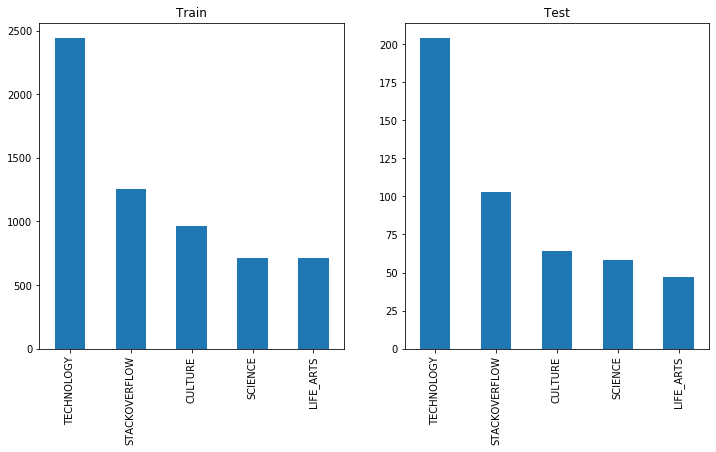

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
train_category.plot(kind='bar', ax=axes[0])
axes[0].set_title('Train')
test_category.plot(kind='bar', ax=axes[1])
axes[1].set_title('Test')
print('Train/Test category distribution')

In [15]:
def plot_wordcloud(text, ax, title=None):
    wordcloud = WordCloud(max_font_size=None, background_color='white',
                          width=1200, height=1000).generate(text_cat)
    ax.imshow(wordcloud)
    if title is not None:
        ax.set_title(title)
    ax.axis("off")

Training data Word Cloud


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


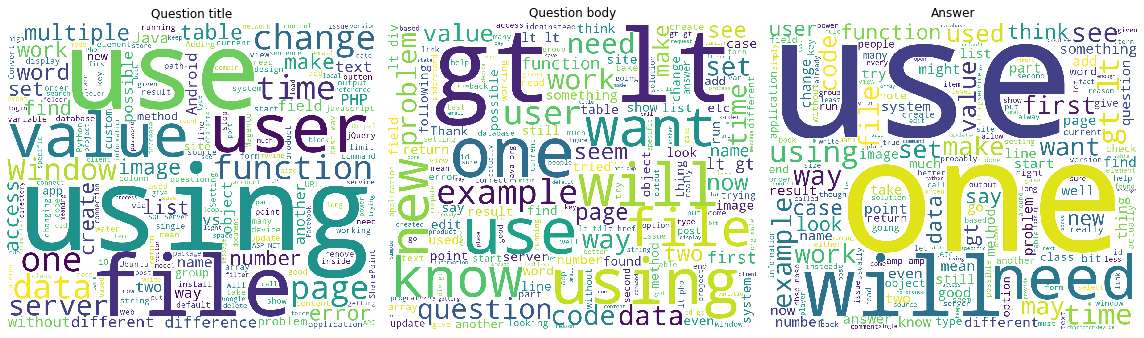

In [16]:
print('Training data Word Cloud')

fig, axes = plt.subplots(1, 3, figsize=(16, 18))

text_cat = ' '.join(train_df['question_title'].values)
plot_wordcloud(text_cat, axes[0], 'Question title')

text_cat = ' '.join(train_df['question_body'].values)
plot_wordcloud(text_cat, axes[1], 'Question body')

text_cat = ' '.join(train_df['answer'].values)
plot_wordcloud(text_cat, axes[2], 'Answer')

plt.tight_layout()
fig.show()

Test data Word Cloud


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


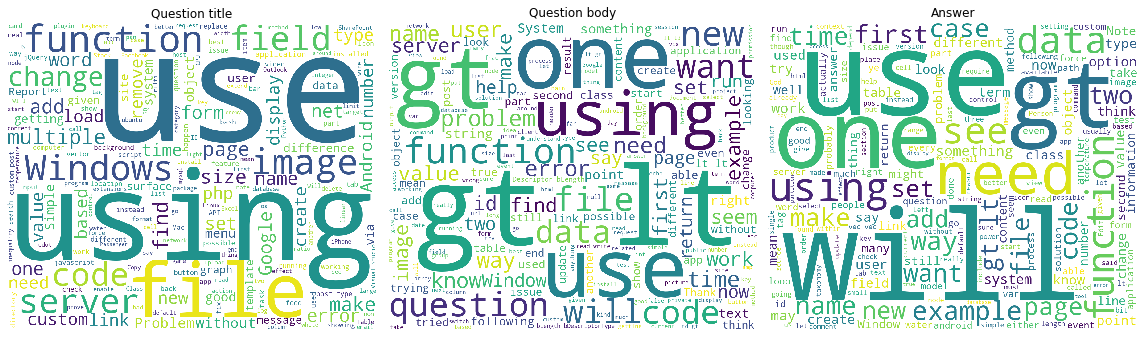

In [17]:
print('Test data Word Cloud')

fig, axes = plt.subplots(1, 3, figsize=(16, 18))

text_cat = ' '.join(test_df['question_title'].values)
plot_wordcloud(text_cat, axes[0], 'Question title')

text_cat = ' '.join(test_df['question_body'].values)
plot_wordcloud(text_cat, axes[1], 'Question body')

text_cat = ' '.join(test_df['answer'].values)
plot_wordcloud(text_cat, axes[2], 'Answer')

plt.tight_layout()
fig.show()

In [18]:
target_columns = [    
    'question_asker_intent_understanding',
    'question_body_critical',
    'question_conversational',
    'question_expect_short_answer',
    'question_fact_seeking',
    'question_has_commonly_accepted_answer',
    'question_interestingness_others',
    'question_interestingness_self',
    'question_multi_intent',
    'question_not_really_a_question',
    'question_opinion_seeking',
    'question_type_choice',
    'question_type_compare',
    'question_type_consequence',
    'question_type_definition',
    'question_type_entity',
    'question_type_instructions',
    'question_type_procedure',
    'question_type_reason_explanation',
    'question_type_spelling',
    'question_well_written',
    'answer_helpful',
    'answer_level_of_information',
    'answer_plausible',
    'answer_relevance',
    'answer_satisfaction',
    'answer_type_instructions',
    'answer_type_procedure',
    'answer_type_reason_explanation',
    'answer_well_written'
]

# Data Preparation

In [40]:
y_train = train_df[target_columns].copy()
x_train = train_df.drop(target_columns, axis=1)
#del train_df

x_test = test_df.copy()
#del test_df

In [25]:
text_encoder = Pipeline([
    ('Text-TF-IDF', TfidfVectorizer(ngram_range=(1, 3))),
    ('Text-SVD', TruncatedSVD(n_components = 100))], verbose=True)

In [26]:
before_dot = re.compile('^[^.]*')

def transform_url(x):
    return x.apply(lambda v: re.findall(before_dot, urlparse(v).netloc)[0])

url_encoder = Pipeline([
    ('URL-transformer', FunctionTransformer(transform_url, validate=False)),
    ('URL-OHE', OneHotEncoder(drop_invariant=True))], verbose=True)

In [27]:
ohe = OneHotEncoder(cols='category', drop_invariant=True)

In [29]:
def count_words(data):
    out = pd.DataFrame(index=data.index)
    for column in data.columns:
        out[column] = data[column].str.split().str.len()
    return out

word_counter = Pipeline([
    ('WordCounter-transformer', FunctionTransformer(count_words, validate=False)),
    ('WordCounter-std', StandardScaler())], verbose=True)

In [30]:
preprocessor = ColumnTransformer([    
    ('Q-T', text_encoder, 'question_title'),
    ('Q-B', text_encoder, 'question_body'),
    ('A', text_encoder, 'answer'),
    ('URL', url_encoder, 'url'),
    ('Categoty', ohe, 'category'),
    ('W-C', word_counter, ['question_body', 'answer'])], verbose=True)

In [41]:
x_test = preprocessor.transform(x_test)

In [49]:
print(x_train.shape, y_train.shape, x_test.shape)

(6079, 366) (6079, 30) (476, 366)


In [43]:
y_train = y_train.values

# Model Creation

In [59]:
rf=RandomForestRegressor(n_estimators=250,max_depth=250)
rf.fit(x_train,y_train)

ValueError: continuous-multioutput is not supported

# Model Evaluation

In [134]:
pre_test = rf.predict(x_test)
pre_train = rf.predict(x_train)
acc_train = rf.score(x_train, y_train)
print("Score:",acc_train)

Score: 0.8968524215720171


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


#

/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


10 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


20 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


30 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


40 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


50 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


60 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


70 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


80 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


90 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


100 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


110 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


120 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


130 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


140 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


150 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


160 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


170 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


180 - estimator completed
190 - estimator completed


/home/chandrakumar/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


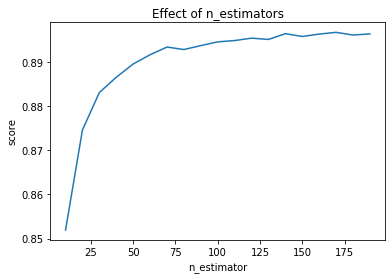

In [136]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(x_train, y_train)
    scores.append(rf.score(x_train, y_train))
    print(f'{n} - estimator completed')
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [139]:
max(scores)

0.8967444516282381

# Output CSV

In [98]:
submission = pd.read_csv("sample_submission.csv", index_col='qa_id')

In [126]:
out = pd.DataFrame(pred_test, index = submission.index, columns = [target_columns])

In [128]:
out.to_csv('sample_submission.csv')